# CS166 Session 6.2 Work



## Review and Concepts

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
# four possible outcomes
probabilities = [0.1, 0.2, 0.3, 0.4]
cumulative_prob = np.cumsum(probabilities)
sample = cumulative_prob.searchsorted(np.random.uniform(0, 1))

The cumsum() method with numpy calculates teh running cumulative sum up to that point. For example, if we were to apply cumsum() to the array [1,2,3]. The calculation happening for the output is [1, 1+2, 1+2+3] --> this means our output is [1, 3, 6].

The searchsorted() method is one that finds where an element should be inserted in order to maintain the order of the array. It finds the indices in a sorted array such that if another array or value is inserted into the returned indices, it would maintain the order of the original array.

### Question 1 of PC Problems

In [27]:
#setting overall parameters
l = 0.1
samples = 1000

#arrival times--we use this to create a schedule
bus_arrivals = np.random.exponential(1/l, samples)
bus_schedule = np.cumsum(bus_arrivals)

#the passenger can arrive at any point until the max bus time
passenger_arrivals = np.random.uniform(0, max(bus_schedule), samples)

#waiting times list
wait_times = []

for arrival in passenger_arrivals:
    #we need to find the closest match in the schedule greater than the passenger arrival
    #the wait time will be the difference between the first value greater than the schedule

    #creating a bus number for the index when it arrives
    bus_num = next(x for x, val in enumerate(bus_schedule) if val > arrival)

    #waiting time
    wait_time = bus_schedule[bus_num] - arrival
    wait_times.append(wait_time)

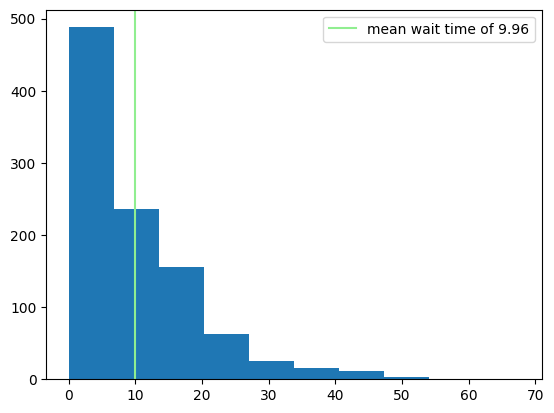

In [29]:
plt.hist(wait_times)
plt.axvline(np.mean(wait_times), color = 'lightgreen', label = 'mean wait time of ' + str(round(np.mean(wait_times), 2)))
plt.legend()

In [19]:
#setting overall parameters
l = 10
samples = 1000

#arrival times--we use this to create a schedule
bus_arrivals = np.random.uniform(0, 2*l, samples)
bus_schedule = np.cumsum(bus_arrivals)

#the passenger can arrive at any point until the max bus time
passenger_arrivals = np.random.uniform(0, max(bus_schedule), samples)

#waiting times list
wait_times = []

for arrival in passenger_arrivals:
    #we need to find the closest match in the schedule greater than the passenger arrival
    #the wait time will be the difference between the first value greater than the schedule

    #creating a bus number for the index when it arrives
    bus_num = next(x for x, val in enumerate(bus_schedule) if val > arrival)

    #waiting time
    wait_time = bus_schedule[bus_num] - arrival
    wait_times.append(wait_time)

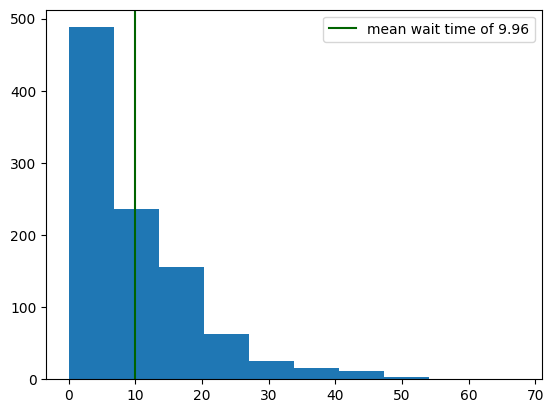

In [30]:
plt.hist(wait_times)
plt.axvline(np.mean(wait_times), color = 'darkgreen', label = 'mean wait time of ' + str(round(np.mean(wait_times), 2)))
plt.legend()

The method used to simulate this scenario was in the creation of a set of bus interarrival times and then using the interarrival times to generate a schedule by using the cumulative sum method. Then, each passenger was simulated using the predefined uniform distribution ranging from the first bus of the day until the last bus. The bus_num was used to find the first bus arrival time greater than the passenger arrival time and then the difference was subsequently calculated to generate the wait time. We see that in the original scenario with an exponential distribution, the output of waiting times abides by a similar exponential distribution. However, we see a different pattern with a descending time distribution when using the $2 \cdot \lambda$ approach in the second scenario.

### Question 2

In [54]:
data = {
    50: 0.00832, 51: 0.00911, 52: 0.00996, 53: 0.01089, 54: 0.01190,
    55: 0.01300, 56: 0.01421, 57: 0.01554, 58: 0.01700, 59: 0.01859,
    60: 0.02034, 61: 0.02224, 62: 0.02431, 63: 0.02657, 64: 0.02904,
    65: 0.03175, 66: 0.03474, 67: 0.03804, 68: 0.04168, 69: 0.04561,
    70: 0.04979, 71: 0.05415, 72: 0.05865, 73: 0.06326, 74: 0.06812,
    75: 0.07337, 76: 0.07918, 77: 0.08570, 78: 0.09306, 79: 0.10119,
    80: 0.10998, 81: 0.11935, 82: 0.12917, 83: 0.13938, 84: 0.15001,
    85: 0.16114, 86: 0.17282, 87: 0.18513, 88: 0.19825, 89: 0.21246,
    90: 0.22814, 91: 0.24577, 92: 0.26593, 93: 0.28930, 94: 0.31666,
    95: 0.35124, 96: 0.40056, 97: 0.48842, 98: 0.66815, 99: 0.72000,
    100: 0.76000, 101: 0.80000, 102: 0.85000, 103: 0.90000,
    104: 0.96000, 105: 1.00000}

In [84]:
#simulation parameters
samples = 1000

#starting parameters
portfolio = 150000

#parameters of returns per year
mu = 0.08
std = 0.09

#at retirement
retire_age = 70
retire_withdrawal = 65000

money_at_death = []
broke = 0
age_of_death = []

#since FM is guarantees to die at age 105, we can backtrack off of this
for sample in range(samples):

    #creating a portfolio value
    net_worth = [portfolio]

    #first we will loop through her age
    for age in range(50, 106):

        #let's check if she's dead
        if sts.bernoulli.rvs(data[age]) == 1:
            money_at_death.append(net_worth[-1])
            age_of_death.append(age)
            break

        #if she's not dead and less than 70
        elif age <= 70:
            #calculating the net return
            net_return = np.random.normal(mu, std)

            #adding to fannie Mae's net worth based on returns and $10k added
            net_worth.append((net_worth[-1] + 10000) * (1 + net_return))

        #if she's not dead above 70
        elif age > 70:
            net_return = np.random.normal(mu, std)

            #adding to fannie Mae's net worth based on returns and $65k removed
            temp_net_worth = net_worth[-1] - 65000

            #if she's not broke
            if temp_net_worth > 0:
                net_worth.append(temp_net_worth * (1 + net_return))

            elif temp_net_worth <= 0:
                broke += 1

    #creating a line plot to test net worth
    #plt.plot(net_worth)



(array([851., 122.,  18.,   5.,   0.,   2.,   1.,   0.,   0.,   1.]),
 array([1.79937356e+03, 2.27713272e+06, 4.55246607e+06, 6.82779941e+06,
        9.10313276e+06, 1.13784661e+07, 1.36537994e+07, 1.59291328e+07,
        1.82044661e+07, 2.04797995e+07, 2.27551328e+07]),
 <BarContainer object of 10 artists>)

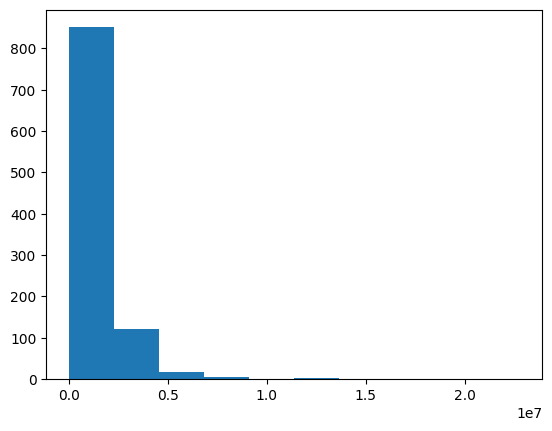

In [74]:
plt.hist(money_at_death)

In [87]:
#probability of running out of money
print('Prob of running out of money: ', broke/samples)
print('Expected age at death: ', np.mean(age_of_death))
print('Median age of death: ', np.median(age_of_death))



Prob of running out of money:  0.079
Expected age at death:  73.721
Median age of death:  74.0


This was a fun simulation. Now, what I would want to do is add in the complication of bankruptcy risk and borrowing costs. It would be fun if when she ran out of money, we had to go to the bank and borrow 100000 at a 6% interest rate. The $65000 would be used for living expenses and the remaining would be reinvested. We can then calculate the net worth as a negative amount with compounding interest and then include a risk of default in the case that the money isn't recouped. The interest rate for the next loan can also be increased when she has to borrow repeatedly. In addition, we could also calculate asset seizure and what happens when she sells off her house or the risk of foreclosure in that scenario. The numbers seem fairly self-explanatory, compound interest is great folks! SO MUCH FUN!